<a href="https://colab.research.google.com/github/IamPrachu7/To-Do-List/blob/main/todo_list_manager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#✨ To-Do List (CLI)

This notebook walks you through building a simple **Command-Line To-Do List Manager** with:
- A clean text-based menu
- Multiple-task adding
- Mark-as-done, delete
- A **progress pie chart** using `matplotlib`



### 1) Imports

In [1]:
import matplotlib.pyplot as plt

## 2) Helper: Display Tasks

In [6]:
def display_tasks(tasks):
    if not tasks:
        print("No tasks in the list.")
    else:
        print("\n--- To-Do List ---")
        for index, task in enumerate(tasks, start=1):
            status = "✓" if task["completed"] else "◻"
            print(f"{index}. [{status}] {task['name']}")

## 3) Helper: Show Progress Chart

In [7]:
def show_progress(tasks):
    if not tasks:
        print("No tasks to analyze.")
        return

    completed = sum(1 for task in tasks if task["completed"])
    pending = len(tasks) - completed
    labels = ['Completed', 'Pending']
    sizes = [completed, pending]
    colors = ['#4CAF50', '#FF9800']  # Feel free to change colors

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title("Task Completion Progress", pad=20)
    plt.show()

### 4) Helper: Add Multiple Tasks

In [8]:
def add_multiple_tasks():
    tasks_to_add = []
    print("\n--- Add Multiple Tasks ---")
    print("(Enter 'done' when finished or 'q' to cancel)")
    while True:
        task = input("Add task: ").strip()
        if task.lower() == 'done':
            break
        elif task.lower() == 'q':
            return None
        elif task:
            tasks_to_add.append({"name": task, "completed": False})
        else:
            print("⚠ Task name cannot be empty.")
    return tasks_to_add

## 5) Main App Loop


✨ To-Do List Manager ✨

Options:
1. ➕ Add Task(s)
2. 👀 View Tasks
3. ✔ Mark Task as Done
4. ❌ Delete Task
5. 📊 View Progress Chart
6. 🚪 Exit
Choose an option (1-6): 1

--- Add Multiple Tasks ---
(Enter 'done' when finished or 'q' to cancel)
Add task: hello 
Add task: hi
Add task: how
Add task: are
Add task: you
Add task: done

Added 5 tasks!

Options:
1. ➕ Add Task(s)
2. 👀 View Tasks
3. ✔ Mark Task as Done
4. ❌ Delete Task
5. 📊 View Progress Chart
6. 🚪 Exit
Choose an option (1-6): 3

--- To-Do List ---
1. [◻] hello
2. [◻] hi
3. [◻] how
4. [◻] are
5. [◻] you
Enter task number to mark as done: 1
Marked 'hello' as done!

Options:
1. ➕ Add Task(s)
2. 👀 View Tasks
3. ✔ Mark Task as Done
4. ❌ Delete Task
5. 📊 View Progress Chart
6. 🚪 Exit
Choose an option (1-6): 3

--- To-Do List ---
1. [✓] hello
2. [◻] hi
3. [◻] how
4. [◻] are
5. [◻] you
Enter task number to mark as done: 4
Marked 'are' as done!

Options:
1. ➕ Add Task(s)
2. 👀 View Tasks
3. ✔ Mark Task as Done
4. ❌ Delete Task
5. 📊 View Pr

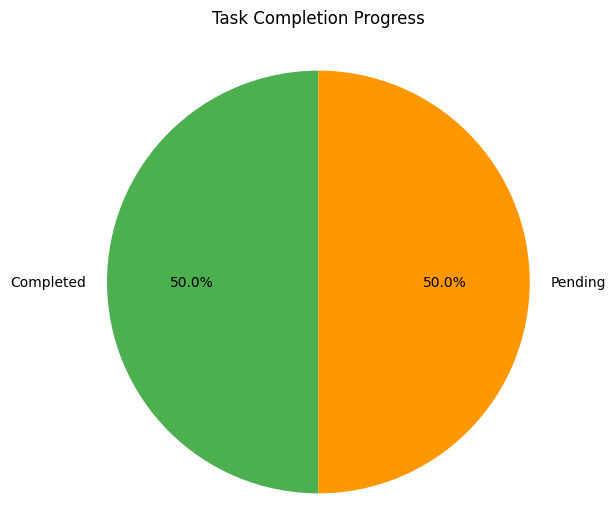


Options:
1. ➕ Add Task(s)
2. 👀 View Tasks
3. ✔ Mark Task as Done
4. ❌ Delete Task
5. 📊 View Progress Chart
6. 🚪 Exit
Choose an option (1-6): 6

Goodbye! Your tasks await you next time. 👋


In [9]:
def main():
    tasks = []
    print("\n✨ To-Do List Manager ✨")

    while True:

        print("\nOptions:\n1. ➕ Add Task(s)\n2. 👀 View Tasks\n3. ✔ Mark Task as Done\n4. ❌ Delete Task\n5. 📊 View Progress Chart\n6. 🚪 Exit")
        choice = input("Choose an option (1-6): ").strip()

        if choice == '1':
            new_tasks = add_multiple_tasks()
            if new_tasks is not None:
                tasks.extend(new_tasks)
                print(f"\nAdded {len(new_tasks)} tasks!")
        elif choice == '2':
            display_tasks(tasks)
        elif choice == '3':
            display_tasks(tasks)
            if tasks:
                try:
                    task_index = int(input("Enter task number to mark as done: ")) - 1
                    if 0 <= task_index < len(tasks):
                        tasks[task_index]["completed"] = True
                        print(f"Marked '{tasks[task_index]['name']}' as done!")
                    else:
                        print("Invalid task number.")
                except ValueError:
                    print("Please enter a valid number.")
        elif choice == '4':
            display_tasks(tasks)
            if tasks:
                try:
                    task_index = int(input("Enter task number to delete: ")) - 1
                    if 0 <= task_index < len(tasks):
                        removed_task = tasks.pop(task_index)
                        print(f"Deleted '{removed_task['name']}'!")
                    else:
                        print("Invalid task number.")
                except ValueError:
                    print("Please enter a valid number.")
        elif choice == '5':
            show_progress(tasks)
        elif choice == '6':
            print("\nGoodbye! Your tasks await you next time. 👋")
            break
        else:
            print("Invalid option. Please choose 1-6.")
main()